##  1. Общее описание

**Аналитическая задача** — провести анализ данных с целью выделения портрета клиентов, которые будут открывать карту, и портрета клиентов, которые не будут открывать карту.

## Описание данных
Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|`client_id`|Идентификационный номер|
|`gender`|Пол|
|`age`|Возраст|
|`marital_status`|Семейный статус|
|`job_position`|Работа|
|`credit_sum`|Сумма кредита|
|`credit_month`|Срок кредитования|
|`score_shk`|Внутренняя скоринговая оценка|
|`education`|Образование|
|`tariff_id`|Идентификационный номер тарифа|
|`living_region`|Регион|
|`monthly_income`|Месячный заработок|
|`credit_count`|Количество кредитов у клиента|
|`overdue_credit_count`|Количество просроченных кредитов у клиента|
|`open_account_flg`|Факт открытия кредитного счета в данном банке|
|`avregzarplata`|Средняя заработная плата в регионе|
|`okrug`|Федеральный округ|
|date_bank|Дата обращения в банк|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие различий в значениям признаков в разрезе групп.

**1. Загрузка данных**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/jenyadev/Desktop/project_4/vkr_dataset_open_credit_card.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

In [3]:
df.describe()

,client_id,gender,age,marital_status,job_position,credit_month,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170744.000000,170741.000000,170746.000000,170746.000000,170743.000000,170746.000000,170554.000000,170554.000000,170554.000000,170744.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,1.480532,36.497312,3.197586,13.160015,10.980749,3.202714,14.118831,43.010009,4.817102,32957.702898,40138.377015,2.107308,0.046070,0.176028
std,49290.268869,0.499622,10.546067,0.738570,3.132421,3.536698,1.064026,11.546768,22.219760,2.263194,12577.448541,25044.251878,1.777128,0.211548,0.380845
min,1.000000,1.000000,18.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,16830.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,1.000000,28.000000,3.000000,14.000000,10.000000,2.000000,2.000000,25.000000,2.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,1.000000,34.000000,3.000000,14.000000,10.000000,4.000000,19.000000,40.000000,5.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,2.000000,43.000000,4.000000,14.000000,12.000000,4.000000,28.000000,63.000000,7.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,2.000000,71.000000,5.000000,18.000000,36.000000,5.000000,33.000000,82.000000,8.000000,66880.000000,950000.000000,21.000000,3.000000,1.000000


In [4]:
df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48.0,3.0,15,59998,10,"0,770249",2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0,2016-02-16 18:54:34
1,2,1,28.0,NaN,15,10889,6,"0,248514",2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0,2016-02-15 12:39:04
2,3,2,32.0,3.0,14,10728,12,"0,459589",4.0,2,64.0,2.0,23430.0,23000.0,5.0,0.0,0,2015-01-27 18:57:19
3,4,1,27.0,2.0,14,"12009,09",12,"0,362536",2.0,2,8.0,8.0,23650.0,17000.0,2.0,0.0,0,2019-05-02 17:57:10
4,5,2,45.0,3.0,14,"16908,89",10,"0,421385",4.0,2,77.0,6.0,26620.0,NaN,1.0,0.0,0,2015-09-22 16:28:33


Во время загрузки данных удалось заметить, сколько всего записей и как много пропущенных значений, некорректные типы. Обработка этих данных будет в следующем шаге.

**2. Первичная обработка данных**

 *Коррекция заголовков*

In [5]:
df.columns 


Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

Новые названия столбцов

In [6]:
df.columns = ['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'region', 'district', 'avg_salary', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank']


In [7]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'region', 'district', 'avg_salary', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg', 'date_bank'],
      dtype='object')

Проверка показала что переименование прошло успешно(выводятся новые названия колонок)

*Коррекция типов*

In [8]:
df["date_bank"] = pd.to_datetime(df["date_bank"])

Перевожу дробные числа в целые (где дробные не обязательны)

In [9]:
col = ["age","marital_status","education","region","district","credit_count","overdue_credit_count"]


Перевожу столбцы к float тк в этих столбцах по виду и с логической точки зрения должны быть числа, а не строки.
Поскольку при переводе во float запятые не позволяют это сделать, заменяем их на точки

In [10]:
col2 = ["credit_sum","score_shk"]
float_cols = ["credit_sum", "score_shk"]

df[col2] = df[col2].apply(
    lambda x: pd.to_numeric(x.str.replace(',', '.').str.strip(), errors='coerce') 
    if x.dtype == 'object' else x
)


In [11]:
df[col] = df[col].astype("Int64")
df[col2] = df[col2].astype(float)

Проверяем удалось ли привести к нужным типам

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             170746 non-null  int64         
 1   gender                170746 non-null  int64         
 2   age                   170744 non-null  Int64         
 3   marital_status        170741 non-null  Int64         
 4   job_position          170746 non-null  int64         
 5   credit_sum            170745 non-null  float64       
 6   credit_month          170746 non-null  int64         
 7   score_shk             170743 non-null  float64       
 8   education             170743 non-null  Int64         
 9   tariff_id             170746 non-null  int64         
 10  region                170554 non-null  Int64         
 11  district              170554 non-null  Int64         
 12  avg_salary            170554 non-null  float64       
 13 

*Проверка на наличие дубликатов*

In [13]:
df.duplicated().sum()

np.int64(0)

Проверка на количество дубликатов показала что их нет (выводится ноль)

*Проверка на наличие пропущенных значений*

In [14]:
print(df.isna().sum())

client_id                  0
gender                     0
age                        2
marital_status             5
job_position               0
credit_sum                 1
credit_month               0
score_shk                  3
education                  3
tariff_id                  0
region                   192
district                 192
avg_salary               192
monthly_income             2
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
date_bank                  0
dtype: int64


Удостоверяюсь на примере нескольких колонок, что действительно пропущенные значения - Nan

In [15]:
df[df["age"].isna()]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,region,district,avg_salary,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
6,7,2,<NA>,3,14,10317.0,6,0.276012,4,25,33,2,26840.0,28000.0,3,0,0,2017-09-05 18:14:54
15,16,2,<NA>,3,14,13209.0,10,0.498255,4,2,40,2,27280.0,34000.0,2,0,0,2021-12-01 16:13:59


In [16]:
df[df["marital_status"].isna()]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,region,district,avg_salary,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
1,2,1,28,<NA>,15,10889.00,6,0.248514,2,2,30,7,66880.0,43000.0,2,0,0,2016-02-15 12:39:04
8,9,2,23,<NA>,14,37577.16,12,0.642267,4,28,73,6,56000.0,50000.0,3,0,0,2020-07-28 17:07:27
10,11,2,26,<NA>,14,NaN,14,0.445430,4,1,63,3,45430.0,36000.0,2,0,0,2019-01-25 10:14:23
45,46,2,39,<NA>,14,21742.22,10,0.356591,4,2,5,7,27280.0,35000.0,4,0,0,2017-12-05 17:44:42
49,50,1,38,<NA>,14,19791.00,10,0.268041,4,3,4,8,27390.0,30000.0,1,0,0,2021-12-30 14:23:41


Замена на ноль

In [17]:
zero_col = ["credit_count","overdue_credit_count","region","district"]
df[zero_col] = df[zero_col].fillna(0)



Замена на "неизвестно"

In [18]:
unkn_col = ["education","marital_status"]

for u in unkn_col:
    df[u] = (
        df[u]
        .astype('Int64')    # сохраняет NaN
        .astype('string')  # делает категорию
        .fillna('Unknown')
    )


  Замена на среднее значение

In [19]:
mean_col = ["age","credit_sum","score_shk","avg_salary","monthly_income"]
df[mean_col] = df[mean_col].fillna(df[mean_col].median())

*Проверка на аномальные значения*

*Есть ли отрицательные числа*

Нахожу все числовые столбцы

In [20]:
num_col = df.select_dtypes(include=[np.number]).columns
num_col

Index(['client_id', 'gender', 'age', 'job_position', 'credit_sum',
       'credit_month', 'score_shk', 'tariff_id', 'region', 'district',
       'avg_salary', 'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg'],
      dtype='object')

 Проверка показала что отриц.значений нет

In [21]:
(df[num_col] < 0).any().any()

np.False_

**3. Исследовательский анализ**

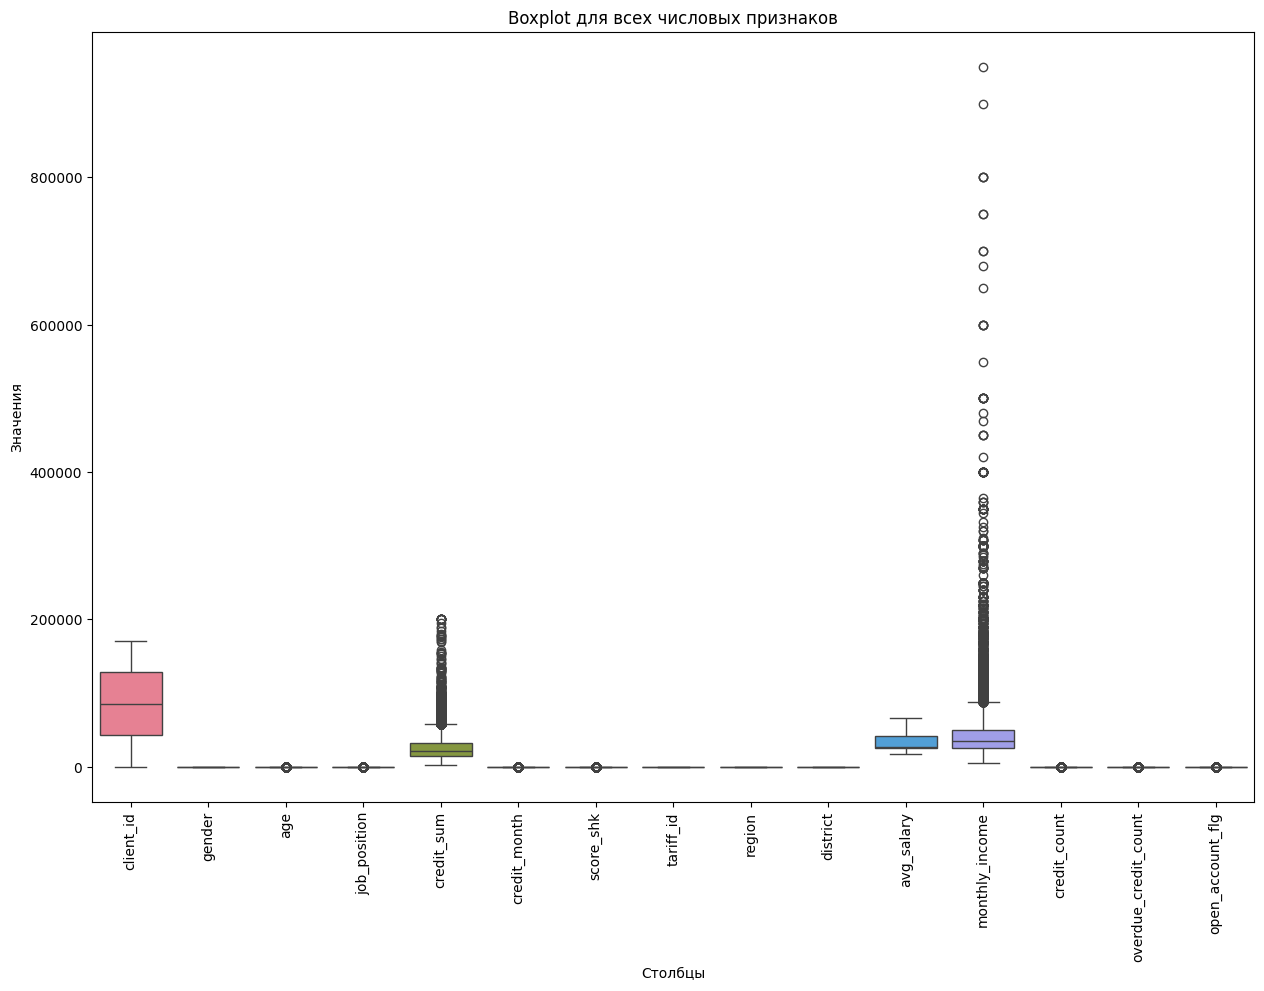

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))

plt.title('Boxplot для всех числовых признаков')
plt.xticks(rotation=90)  # Если столбцов много, поворачиваем метки по оси X для удобства
plt.xlabel('Столбцы')
plt.ylabel('Значения')

plt.show()


credit_sum:  
толстая часть внизу → большинство кредитов небольшие
длинный хвост вверх → редкие, но большие кредиты  
avg_salary: 
компактная форма
хвосты умеренные
распределение самое «здоровое».   
monthly_income:
экстремальный правый хвост
медиана сильно ниже среднего
скорее всего есть VIP-клиенты
Идентификатор клиента (client_id) не несёт аналитической нагрузки и не подлежит интерпретации как числовой признак

**4.Отбор признаков и портрета клиентов**

Открывают ли мужчины карту чаще чем женщины?

<Axes: xlabel='gender', ylabel='count'>

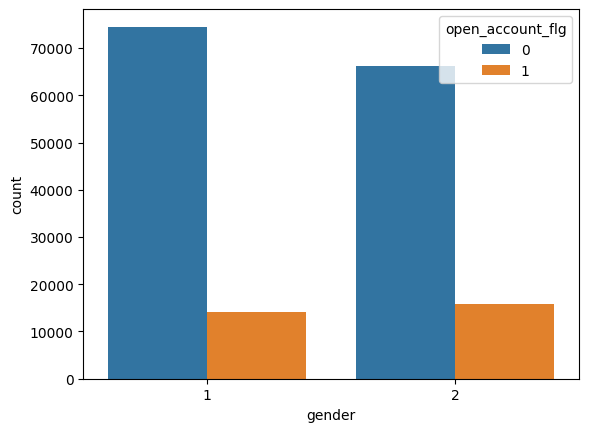

In [24]:
sns.countplot(data=df, x="gender", hue="open_account_flg")

Различий между открывшими счет в зависимости от пола нет - столбцы почти на одном уровне

Зависит ли от возраста?

<Axes: xlabel='age'>

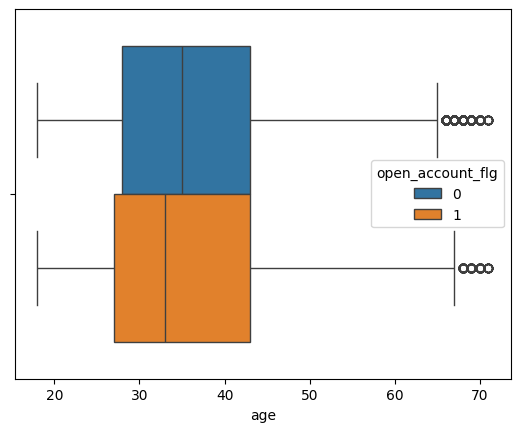

In [25]:
sns.boxplot(data=df, x="age", hue="open_account_flg")

У не открывших медиана возраста примерно 33–34
У открывших  медиана чуть ниже, около 31–32
Карту чаще открывают чуть более молодые клиенты. Разница есть, но она не огромная.

Сам ящик примерно 50% клиентов
У обеих групп основной возраст:
примерно 25–40 лет
«Усы» — нормальный диапазон
Слева — примерно от 18–20 лет
Справа — до 60+

Точки справа — выбросы
Это клиенты 65–70 лет
Они есть и среди открывших, и среди не открывших
Это НЕ аномальное значение
Просто редкие клиенты старшего возраста.


Зависит ли от работы

<Axes: xlabel='job_position', ylabel='count'>

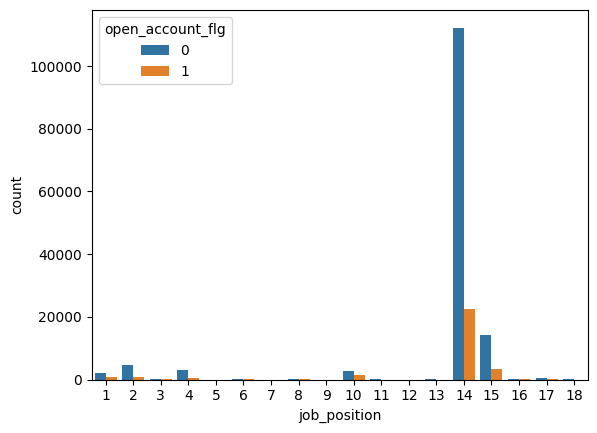

In [26]:
sns.countplot(data=df, x="job_position", hue="open_account_flg")

<Axes: xlabel='credit_sum'>

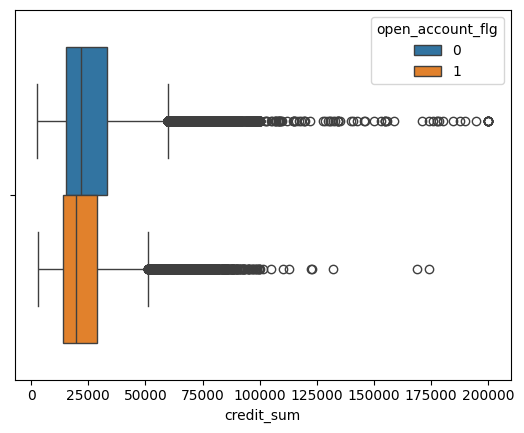

In [27]:
sns.boxplot(data=df, x="credit_sum", hue="open_account_flg")

Распределения доходов для открывших счет  и не открывших  очень похожи: коробки и медианы находятся примерно на одном уровне, форма и разброс также схожи. 
Это говорит о том, что явной, сильной разницы распределений по сумме кредита между группами не наблюдается. 
Высокие доходы встречаются и в группе 0, и в группе 1
«хвосты» выбросов тянутся примерно одинаково далеко, поэтому по графику нельзя сказать, что этот признак является фактором, влияющим на открытие карты.

<Axes: xlabel='monthly_income'>

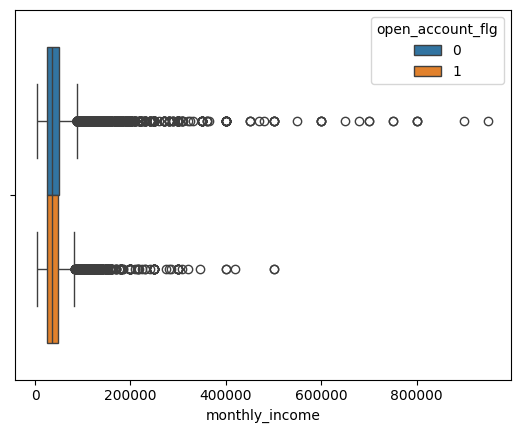

In [30]:
sns.boxplot(data=df, x="monthly_income", hue="open_account_flg")

Аналогично с суммой кредита:
Распределения доходов для открывших счет  и не открывших  очень похожи: коробки и медианы находятся примерно на одном уровне, форма и разброс также схожи. 
Это говорит о том, что явной, сильной разницы распределений по месячному доходу между группами не наблюдается. 
Поэтому по графику нельзя сказать, что этот признак является фактором, влияющим на открытие карты.


<Axes: xlabel='avg_salary'>

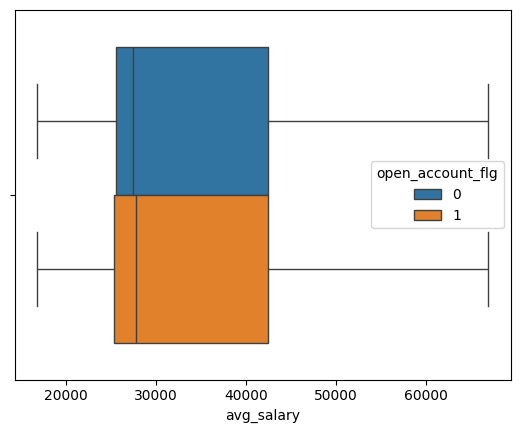

In [40]:
sns.boxplot(data=df, x="avg_salary", hue="open_account_flg")

Медиана у обеих групп очень близка: в значит типичный уровень зарплаты у открывших и не открывших карту примерно одинаковый. 
 «усы» тянутся примерно в одни и те же стороны, поэтому доли 0 и 1 по графику выглядят схожими. 
График не даёт визуально явного разделения между группами. 

<Axes: xlabel='overdue_credit_count', ylabel='count'>

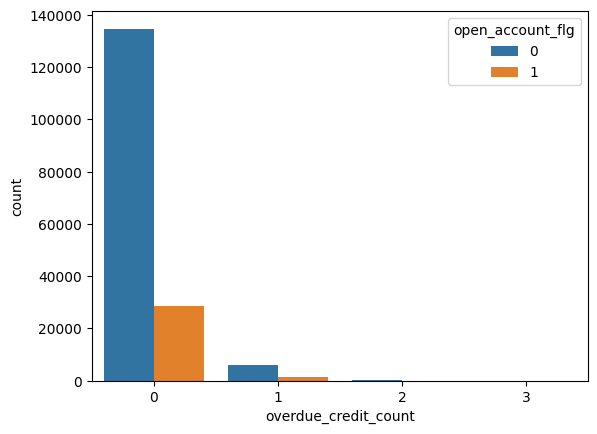

In [36]:
sns.countplot(data=df, x="overdue_credit_count", hue="open_account_flg")

Большинство клиентов не имеют просроченных кредитов независимо от фактора открытия карты. Соответственно это не является значимым фактором влияющие на открытие карты

Вывод:
В ходе исследовательского анализа данных были проанализированы характеристики клиентов в разрезе факта открытия карты.  
По большинству признаков распределения клиентов, открывших и не открывших карту, существенно не различаются.  
Вероятно, решение об открытии карты формируется под влиянием совокупности факторов либо других признаков (маркетинговые предложения, индивидуальные условия, поведенческие характеристики), которые отсутствуют в датасете.